/tmp/ipykernel_40860/2512138847.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by=['id', 'day'], inplace=True)
/tmp/ipykernel_40860/2512138847.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.sort_values(by=['id', 'day'], inplace=True)


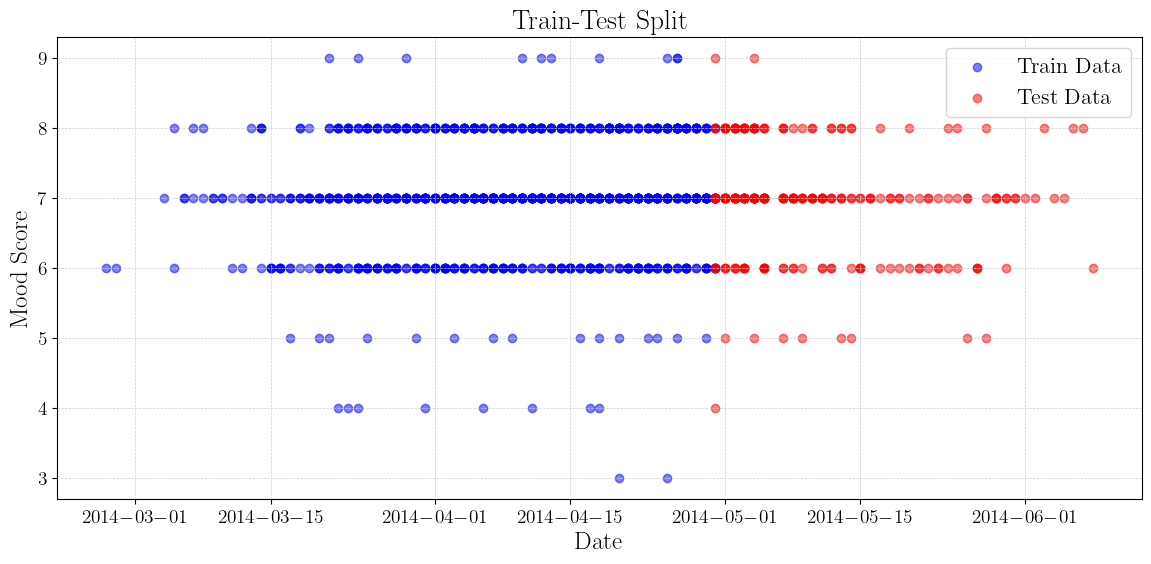

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",
    "font.size": 18,
    "axes.titlesize": 18,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "figure.figsize": (8, 6),
    "figure.dpi": 100,
    "savefig.dpi": 200,
    "savefig.format": "png",
    "savefig.transparent": True,
    "axes.grid": True,
    "grid.linewidth": 0.5,
    "grid.linestyle": "--",
    "grid.color": "0.8",
    "image.cmap": "Blues",
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
    "text.usetex": True, "mathtext.fontset": "cm",
    "pgf.preamble": r"\usepackage[utf8]{inputenc}\usepackage[T1]{fontenc}\usepackage{cmbright}"
})



filepath = '../data/preprocessed/engineered_data.csv'
data_cleaned = pd.read_csv(filepath)

# Sort the data by 'day'
data_cleaned['day'] = pd.to_datetime(data_cleaned['day'])
data_cleaned.sort_values(by='day', inplace=True)

# Determine the cut-off day for the 80:20 split
cutoff = int(len(data_cleaned) * 0.8)

# Split the data into training and testing sets
train_data = data_cleaned.iloc[:cutoff]
test_data = data_cleaned.iloc[cutoff:]

train_data.sort_values(by=['id', 'day'], inplace=True)
test_data.sort_values(by=['id', 'day'], inplace=True)

train_data.to_csv('../data/preprocessed/train_classification.csv', index=False)
test_data.to_csv('../data/preprocessed/test_classification.csv', index=False)

# Plotting to visually inspect the train-test split
plt.figure(figsize=(14, 6))
plt.scatter(train_data['day'], train_data['mood'], label='Train Data', color='blue', alpha=0.5)
plt.scatter(test_data['day'], test_data['mood'], label='Test Data', color='red', alpha=0.5)
plt.title('Train-Test Split', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Mood Score', fontsize=18)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.savefig('../figures/train_test_split.png')
plt.show()